In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [15]:
class Neuron:
    def __init__(self, input_size):
        self.input_size = input_size
        
        self.weights = []
        for _ in range(input_size):
            self.weights.append(random.uniform(-1, 1))
        
        self.bias = random.uniform(-1, 1)
    
    def output(self, inputs):
        return max(0, np.dot(self.weights, inputs) + self.bias)
        
    
    def nudge(self, amt_weight, amt_bias):
        new_weights = []
        for weight in self.weights:
            new_weights.append(weight + amt_weight)
        self.weights = new_weights
        
        new_bias = self.bias + amt_bias
        self.bias = new_bias

In [16]:
class Layer:
    def __init__(self, size, input_size, name):
        self.size = size
        self.input_size = input_size
        self.name = name
        self.neurons = []
        
        print(f'Layer {name} | IS {self.input_size}')
        for i in range(self.size):
            self.neurons.append(Neuron(input_size=self.input_size))
            print(f'Neuron {i + 1} | B {len(self.neurons[i].weights)} | B {self.neurons[i].bias}')
        print('==========================================')

    def output(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output(inputs))
        return outputs
    
    def nudge(self, amt_weight, amt_bias):
        for neuron in self.neurons:
            neuron.nudge(amt_weight, amt_bias)
    
    def forward(self, layer):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output(self.inputs))
        layer.inputs = outputs

In [17]:
def cost(output, desired_output):
    return (output - desired_output) ** 2

In [18]:
def weight_sensitivity(desired_output, final_output, front_weight, back_activation, layer_weight, layer_bias):
    unactivated = (layer_weight * back_activation) + layer_bias
    return 0 if unactivated < 0 else (-2 * (front_weight * back_activation) * (final_output - desired_output))

def bias_sensitivity(desired_output, final_output, front_weight):
    return (-2 * front_weight * (final_output - desired_output))

desired_output = 5
for epoch in range(1000):
    for layer in all layers but the last:
        forward
    
    current_output = last layer's final output
    for layer in reversed list of layers WITH INDEX:
        variables:
            w = weight of layer in front of layer (1 if output layer)
            a = activation of layer behind current layer
        
        weight sensitivity = function(output, weight of front layer, activation of back layer, desired output)
        bias sensitivity = function(desired output, weight of front layer, output)
        
        nudge neuron in layer by sensitivities

Layer INPUT | IS 1
Neuron 1 | B 1 | B 0.12860185634195398
Layer OUTPUT | IS 1
Neuron 1 | B 1 | B -0.56153853558588


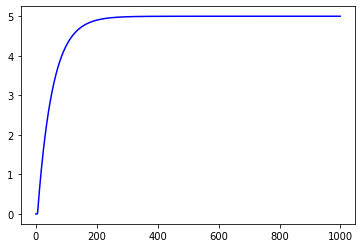

In [129]:
layers = [    
    Layer(size=1,
         input_size=1,
         name='INPUT'),
        Layer(size=1,
         input_size=1,
         name='OUTPUT')
]

layers[0].inputs = [1]

desired_output = 5

inputs = []
outputs = []
for epoch in range(1000):
    for i in range(len(layers) - 1):
        layers[i].forward(layers[i + 1])
    
    final_output = layers[-1].output(layers[-1].inputs)[0]
    
    for layer in layers:
        index = layers.index(layer)
        weight_front = 1 if index == len(layers) - 1 else layers[index + 1].neurons[0].weights[0]
        activation_back = layer.inputs[0] # previous activation becomes inputs, right?
        layer_weight = layer.neurons[0].weights[0]
        layer_bias = layer.neurons[0].bias
        
        w_sens = weight_sensitivity(desired_output=desired_output,
                                   final_output=final_output,
                                    front_weight=weight_front,
                                    back_activation=activation_back,
                                    layer_weight=layer_weight,
                                    layer_bias=layer_bias)
        
        b_sens = bias_sensitivity(desired_output=desired_output,
                                 final_output=final_output,
                                 front_weight=weight_front)
        
        layer.neurons[0].nudge(w_sens * 0.01, b_sens * 0.01)
        
    inputs.append(epoch)
    outputs.append(final_output)
    
plt.plot(inputs, outputs, 'b')
plt.show()

In [35]:
layers = [    
    Layer(size=1,
         input_size=1,
         name='INPUT')
]
layers[0].inputs=[1]

inps=[]
outputs=[]
  

for x in range(10000):  
    for i in range(len(layers) - 1):
        layers[i].forward(layers[i + 1])
        
    for layer in reversed(layers):
        if layers.index(layer) == len(layers) - 1:
            desired_out = 2
        else:
            desired_out = (layer.output(layer.inputs)[0] - o_sens) * .01
        inputs = layer.inputs[0]
        weight = layer.neurons[0].weights[0]
        bias = layer.neurons[0].bias
        out = layer.neurons[0].output([inputs])
        
        c = cost(out, desired_out)
        w_sens = weight_sensitivity(out, desired_out, weight, inputs, bias)
        b_sens = bias_sensitivity(out, desired_out, inputs)
        o_sens = prev_output_sensitivity(out, desired_out, inputs, weight)
        
        layer.nudge(w_sens * .01, b_sens * .01 )
    
        print(f'Output {out}')
        print(f'Cost {c}')
        print(f'Weight Sensitivity {w_sens}')
        print(f'Bias Sensitivity {b_sens}')
        print(f'Previous Output Sensitivity {o_sens}')
        print('====================================')
    
    
    
    inps.append(x)
    outputs.append(layers[-1].output(layers[-1].inputs))    
plt.title('Output per Epoch')
plt.plot(inps, outputs, 'b')
plt.show()

Layer INPUT | IS 1
Neuron 1 | B 1 | B -0.8690269018844627


TypeError: weight_sensitivity() missing 1 required positional argument: 'layer_bias'

In [ ]:
layers = [    
    Layer(size=1,
         input_size=1,
         name='INPUT'),
    Layer(size=1,
         input_size=1,
         name='HIDDEN1'),
    Layer(size=1,
         input_size=1,
         name='OUTPUT')
]
layers[0].inputs=[1]

inps=[]
outputs=[]
  
for x in range(1000):  
    for i in range(len(layers) - 1):
        layers[i].forward(layers[i + 1])
        
    for layer in reversed(layers):
        if layers.index(layer) == len(layers) - 1:
            desired_out = 5
        else:
            desired_out = (layer.output(layer.inputs)[0] - o_sens) * .001
        inputs = layer.inputs[0]
        weight = layer.neurons[0].weights[0]
        bias = layer.neurons[0].bias
        out = layer.neurons[0].output([inputs])
        
        c = cost(out, desired_out)
        w_sens = weight_sensitivity(out, desired_out, weight, inputs, bias)
        b_sens = bias_sensitivity(out, desired_out, inputs)
        o_sens = prev_output_sensitivity(out, desired_out, inputs, weight)
        
        layer.nudge(w_sens * .01, b_sens * .01 )
    
        print(f'{layers.index(layer)}Output {out}')
        print(f'Cost {c}')
        print(f'Weight Sensitivity {w_sens}')
        print(f'Bias Sensitivity {b_sens}')
        print(f'Previous Output Sensitivity {o_sens}')
        print('====================================')
    
    
    
    inps.append(x)
    outputs.append(layers[-1].output(layers[-1].inputs))    
plt.title('Output per Epoch')
plt.plot(inps, outputs, 'b')
plt.show()

In [ ]:
layers[0].inputs = [9]
layers[0].forward(layers[1])
layers[1].forward(layers[2])
print(layers[2].output(layers[2].inputs))